In [33]:
import pandas as pd 
import numpy as np  
import mlflow
import mlflow.sklearn
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [8]:
data = pd.read_csv("../data/heart_failure_clinical_records_dataset.csv") 
data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
print("Shape of the data", data.shape)

Shape of the data (299, 13)


In [10]:
print("Information about data:- ") 
data.info()

Information about data:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 

In [11]:
print("describing the data:- ") 
data.describe()

describing the data:- 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
print(f"No. of Null Values:-" ) 
data.isnull().sum().sum()

No. of Null Values:-


np.int64(0)

Total No. Of Living Cases :-  203
Total No. Of Died Cases :-  96


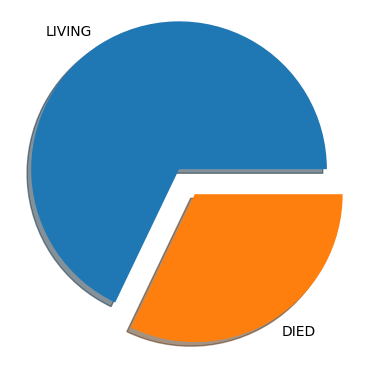

In [13]:
# seeing the distribution of classes, this will help us to identify which types 

len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_death = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live , len_death]) 
labels = ['LIVING', 'DIED'] 
print("Total No. Of Living Cases :- ", len_live)
print("Total No. Of Died Cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 

# inference :- we are actually working on imbalance data  
# imbalance:- your data is not equally distributed between classes 

C:\Users\Nikhil Gupta\AppData\Local\Temp\ipykernel_10148\310037706.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


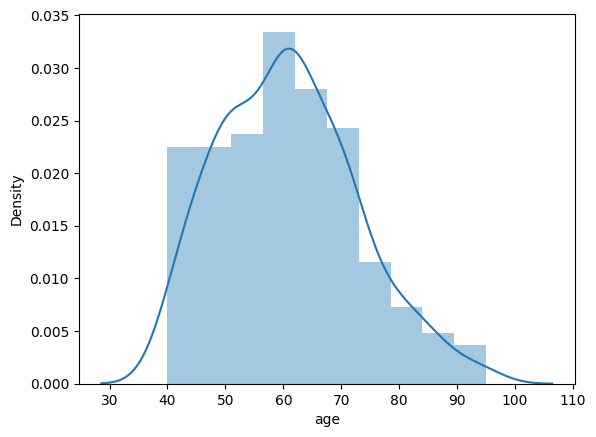

In [14]:
# seeing the distribution of Age  

sns.distplot(data["age"]) 
plt.show() 

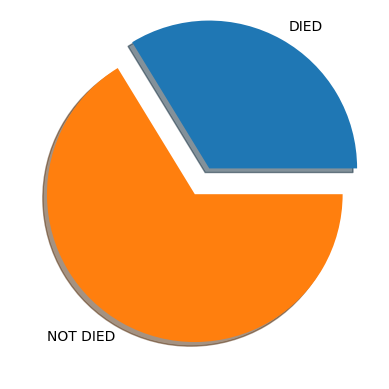

Total no. of died cases,  85
Total no. of not died cases,  167


In [15]:
# selecting rows that are above age 50 and seeing died or not 
age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]  

len_died = len(age_above_50_died) 
len_not_died = len(age_above_50_not_died) 

arr1 = [len_died, len_not_died] 
labels = ['DIED', 'NOT DIED'] 

plt.pie(arr1, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

print ("Total no. of died cases, ", len_died) 
print("Total no. of not died cases, ", len_not_died)
# inference in most of the cases people aged above 50 not died but accordinly if you compare with above 
# plot you will be seeing that died ration is comparitively higher here 

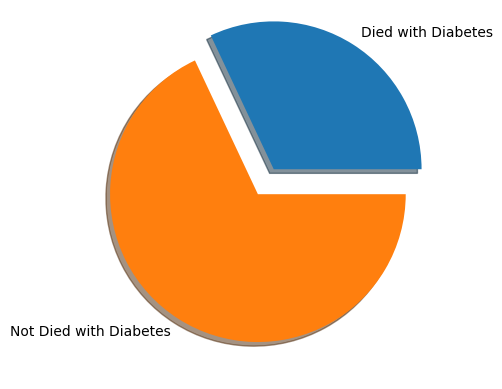

In [16]:
patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0] 
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1) 
len_d_alive = len(patient_nhave_diabetes_0) 

arr2 = [len_d_died,len_d_alive] 
labels = ['Died with Diabetes', "Not Died with Diabetes"] 
plt.pie(arr2, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

# inference:- here you can see the that the most of the person are alive who have diabetes

" \n - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. \n - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  \n - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  \n - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   \n - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.\n"

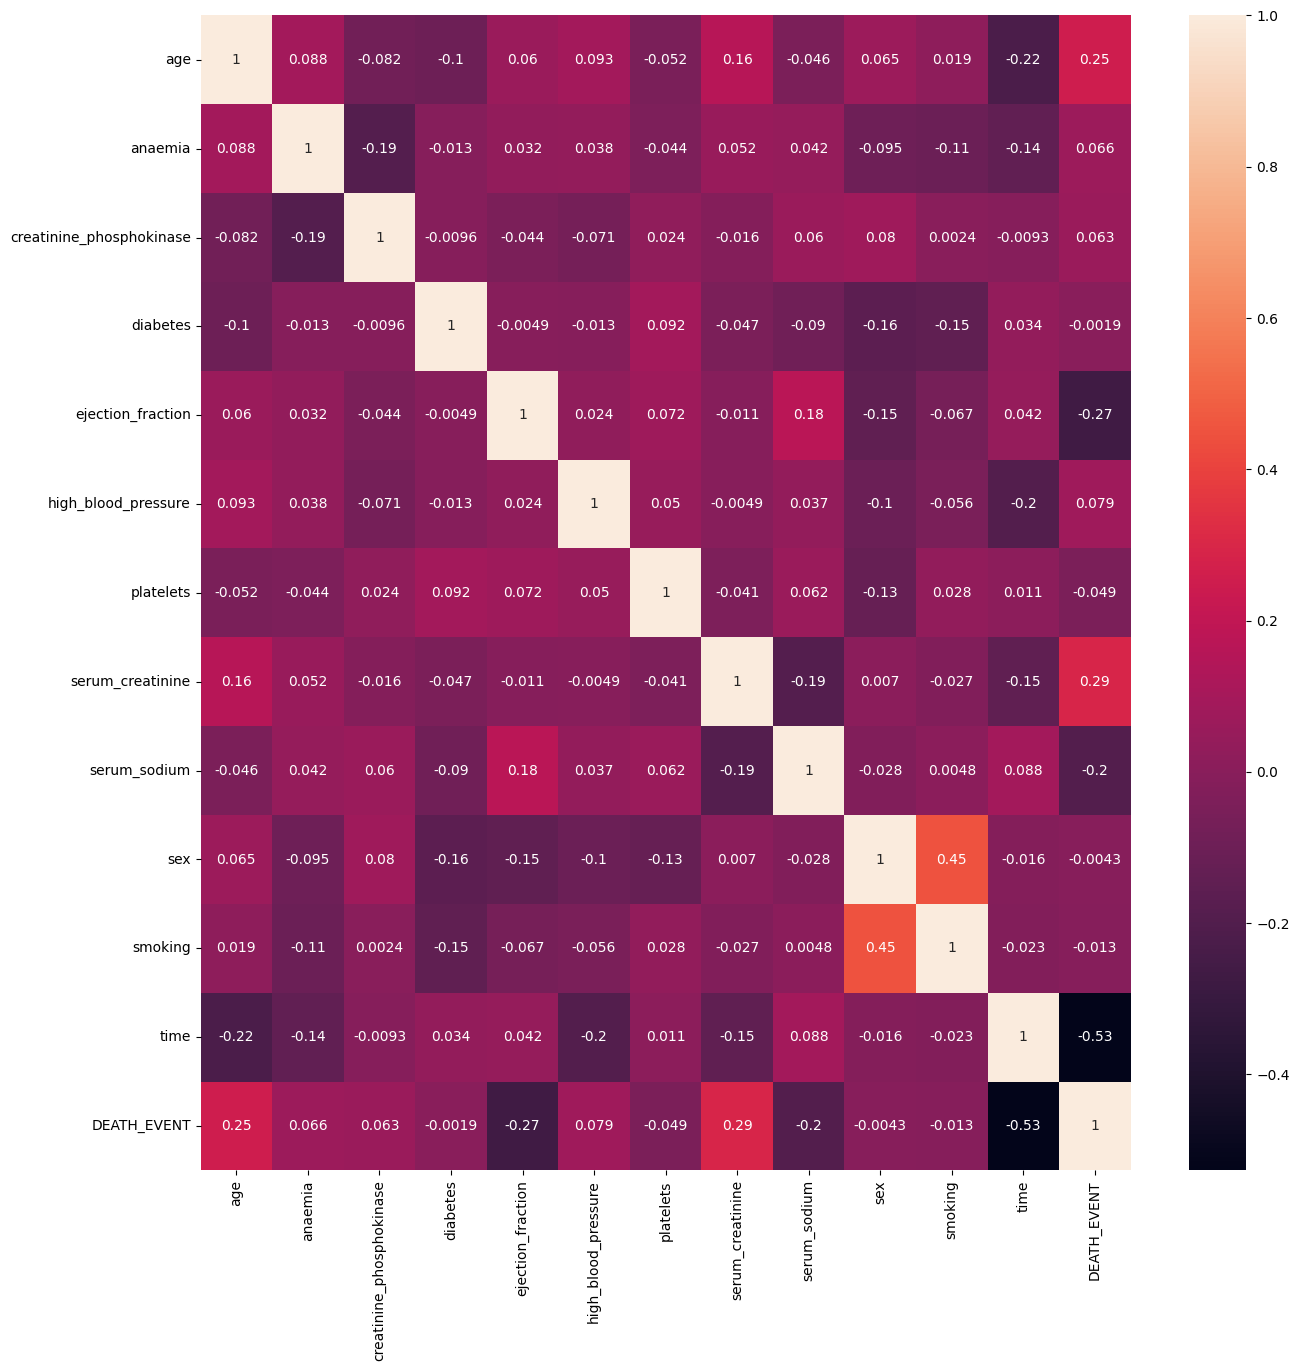

In [17]:
# checking the Correlation of our variables  

corr = data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 

# interpretation of correlation matrix 

''' 
 - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
 - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  
 - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  
 - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   
 - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
''' 

# references:- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [18]:
# you can do the same as here 
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [19]:
from sklearn.model_selection import train_test_split 

X = data.drop('DEATH_EVENT', axis=1) 
y = data["DEATH_EVENT"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) 
print("Shape of the X_train", X_train.shape) 
print("Shape of the y_train", y_train.shape) 
print("Shape of the X_test", X_test.shape) 
print("Shape of the y_test", y_test.shape) 

Shape of the X_train (209, 12)
Shape of the y_train (209,)
Shape of the X_test (90, 12)
Shape of the y_test (90,)


In [20]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)

    for i in range(m):
        
        feature_i_name = features[i]
        
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] =  feature_i_data * feature_j_data
        
    return X_int 


x_train_mod = add_interactions(X_train) 
x_test_mod  = add_interactions(X_test) 

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

In [ ]:
# building logistic regression model as a baseline model 

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter=1000) 
lr_clf.fit(X_train, y_train) 

lr_clf_pred = lr_clf.predict(X_test) 

c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/08/01 00:05:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 00:05:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/08/01 00:05:58 WARNING mlflow.models.model: Model logged without a signature an

In [23]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test, y_pred)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.8235294117647058
Recall Score:-  0.5
Confusion Matrix:- 
 [[59  3]
 [14 14]]


In [24]:
# building logistic regression with StandardScaler  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression()) 
lr_clf_pip.fit(X_train, y_train) 

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.7894736842105263
Recall Score:-  0.5357142857142857
Confusion Matrix:- 
 [[58  4]
 [13 15]]


In [25]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [26]:
grid.best_estimator_

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.0001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
svc = SVC(C = 10, gamma = 0.0001) 
svc.fit(X_train, y_train) 
y_pred2 = svc.predict(X_test) 
evaluating_model(y_test, y_pred2)

Accuracy Score:-  0.6777777777777778
Precision Score:-  0.4
Recall Score:-  0.07142857142857142
Confusion Matrix:- 
 [[59  3]
 [26  2]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.847
Test score: 0.756


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\Nikhil Gupta\Desktop\projects\heart_failure

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0075
,max_features,0.75
,random_state,2
,max_leaf_nodes,25
,min_impurity_decrease,0.0005
,class_weight,None


In [29]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.72
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[55  7]
 [10 18]]


In [30]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))


Training score: 0.847
Test score: 0.867


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\Nikhil Gupta\Desktop\projects\heart_failur

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.01
,bootstrap,True
,oob_score,False


In [31]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2) 
rf_clf.fit(X_train, y_train)  
pred5 = rf_clf.predict(X_test) 
evaluating_model(y_test, pred5)

Accuracy Score:-  0.8666666666666667
Precision Score:-  0.9
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[60  2]
 [10 18]]


In [40]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.57361
[1]	validation_0-logloss:0.53584


[2]	validation_0-logloss:0.50691
[3]	validation_0-logloss:0.48481
[4]	validation_0-logloss:0.46887
[5]	validation_0-logloss:0.45323
[6]	validation_0-logloss:0.43762
[7]	validation_0-logloss:0.42848
[8]	validation_0-logloss:0.41605
[9]	validation_0-logloss:0.40167
[10]	validation_0-logloss:0.39598
[11]	validation_0-logloss:0.38821
[12]	validation_0-logloss:0.38315
[13]	validation_0-logloss:0.38034
[14]	validation_0-logloss:0.37840
[15]	validation_0-logloss:0.37705
[16]	validation_0-logloss:0.37340
[17]	validation_0-logloss:0.37313
[18]	validation_0-logloss:0.37036
[19]	validation_0-logloss:0.36811
[20]	validation_0-logloss:0.36327
[21]	validation_0-logloss:0.36105
[22]	validation_0-logloss:0.35907
[23]	validation_0-logloss:0.35762
[24]	validation_0-logloss:0.35661
[25]	validation_0-logloss:0.35572
[26]	validation_0-logloss:0.35216
[27]	validation_0-logloss:0.34924
[28]	validation_0-logloss:0.34791
[29]	validation_0-logloss:0.34517
[30]	validation_0-logloss:0.34345
[31]	validation_0-logl

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
pred6 = xgb1.predict(X_test) 
evaluating_model(y_test, pred6)

Accuracy Score:-  0.8666666666666667
Precision Score:-  0.7857142857142857
Recall Score:-  0.7857142857142857
Confusion Matrix:- 
 [[56  6]
 [ 6 22]]


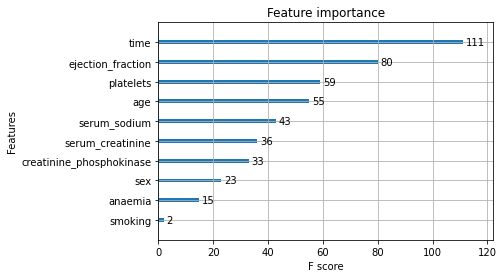

In [ ]:
from xgboost import plot_importance
# xgb.feature_importances_ 
plot_importance(xgb1)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(X_train, y_train) 

pred_gdbt = gbdt.predict(X_test) 
evaluating_model(y_test, pred_gdbt)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8571428571428571
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[59  3]
 [10 18]]


### Choosing the best model and saving them 

In [ ]:
# we will choose XGboost 

import joblib 
joblib.dump(xgb1, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

C:\Users\welcome\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [ ]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

# --- Helper Function for Dominating MLflow Logging ---
# This function takes a model and logs everything we care about. No more repetition.
def log_model_performance(model, run_name, X_test, y_test):
    """
    Logs a scikit-learn compatible model's parameters, metrics, and artifacts to MLflow.
    """
    with mlflow.start_run(run_name=run_name) as run:
        # Make predictions to evaluate the model
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # 1. Log Parameters
        # For pipelines, get_params() gives us parameters for all steps.
        mlflow.log_params(model.get_params())
        print(f"Logged parameters for {run_name}")

        # 2. Log Metrics
        metrics = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall
        }
        mlflow.log_metrics(metrics)
        print(f"Logged metrics for {run_name}: {metrics}")

        # 3. Log Confusion Matrix as an image artifact
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
        ax.set_title('Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        # Save the plot to a file to be logged as an artifact
        artifact_path = f"confusion_matrix_{run_name}.png"
        fig.savefig(artifact_path)
        mlflow.log_artifact(artifact_path, "plots")
        plt.close(fig) # Close plot to prevent it from displaying in notebook
        print(f"Logged confusion matrix plot for {run_name}")
        
        # 4. Log the Model itself
        # Use the specific flavor for XGBoost for richer logging
        if "XGBClassifier" in str(type(model)):
             mlflow.xgboost.log_model(model, "model", signature=mlflow.models.infer_signature(X_test, y_pred))
        else:
             mlflow.sklearn.log_model(model, "model", signature=mlflow.models.infer_signature(X_test, y_pred))
        
        print(f"Logged model artifact for {run_name}. Run ID: {run.info.run_id}")
        print("-" * 50)


# --- Main Execution Block ---

# Set the experiment name. If it doesn't exist, MLflow creates it.
experiment_name = "Heart Failure Classification"
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_name)
print(f"Using MLflow experiment: '{experiment_name}'")
print("-" * 50)

# Assuming all your models are trained and available in memory:
# lr_clf, lr_clf_pip, svc, ds_clf, rf_clf, xgb1, gbdt

# --- Now, log each of your models with a single function call ---

log_model_performance(lr_clf, "1_LogisticRegression_Baseline", X_test, y_test)
log_model_performance(lr_clf_pip, "2_LogisticRegression_Scaled", X_test, y_test)
log_model_performance(svc, "3_SVC_Tuned", X_test, y_test)
log_model_performance(ds_clf, "4_DecisionTree_Tuned", X_test, y_test)
log_model_performance(rf_clf, "5_RandomForest_Tuned", X_test, y_test)
log_model_performance(xgb1, "6_XGBoost_Tuned", X_test, y_test)

print("\nAll models have been logged to MLflow.")
print("To view the results, run 'mlflow ui' in your terminal and open a browser to http://127.0.0.1:5000")

In [50]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
    matthews_corrcoef,
    RocCurveDisplay,
    PrecisionRecallDisplay
)
import os

def log_dominant_run(model, run_name, X_train, y_train, X_test, y_test):
    """
    Logs a model's full experimental context to MLflow, including
    datasets, parameters, comprehensive metrics, and diagnostic plots.
    """
    with mlflow.start_run(run_name=run_name) as run:
        print(f"--- Starting Run: {run_name} ---")

        # === 1. Log Dataset Artifacts for Full Reproducibility ===
        # Create a temporary directory for our data artifacts
        os.makedirs("temp_data", exist_ok=True)
        # Combine features and target, then save to CSV
        pd.concat([X_train, y_train], axis=1).to_csv("temp_data/train_dataset.csv", index=False)
        pd.concat([X_test, y_test], axis=1).to_csv("temp_data/test_dataset.csv", index=False)
        # Log the entire directory as an artifact
        mlflow.log_artifacts("temp_data", artifact_path="data")
        print("Logged train/test datasets.")
        
        # === 2. Log Model Parameters ===
        mlflow.log_params(model.get_params())
        print("Logged model parameters.")

        # === 3. Make Predictions (both class and probability) ===
        y_pred = model.predict(X_test)
        y_pred_proba = None
        # Use a try-except block as some models (like default SVC) don't have predict_proba
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        except AttributeError:
            print("Model does not have predict_proba method.")

        # === 4. Log Comprehensive Metrics ===
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred),
            "mcc": matthews_corrcoef(y_test, y_pred),
            "true_negatives": tn,
            "false_positives": fp,
            "false_negatives": fn,
            "true_positives": tp,
        }
        # Only log probability-based metrics if they exist
        if y_pred_proba is not None:
            metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
            metrics["log_loss"] = log_loss(y_test, y_pred_proba)
            
        mlflow.log_metrics(metrics)
        print("Logged comprehensive metrics.")

        # === 5. Log Rich Visual Artifacts ===
        # Confusion Matrix Plot
        fig_cm, ax_cm = plt.subplots()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=ax_cm, cmap='viridis')
        ax_cm.set_title('Confusion Matrix')
        mlflow.log_figure(fig_cm, "plots/confusion_matrix.png")

        # ROC and Precision-Recall Curve Plots (if probabilities available)
        if y_pred_proba is not None:
            fig_roc, ax_roc = plt.subplots()
            RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=ax_roc)
            mlflow.log_figure(fig_roc, "plots/roc_curve.png")

            fig_pr, ax_pr = plt.subplots()
            PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, ax=ax_pr)
            mlflow.log_figure(fig_pr, "plots/precision_recall_curve.png")

        # Feature Importance Plot (for tree-based models)
        # Check if the model object itself has the attribute, or if it's the last step in a pipeline
        final_estimator = model.steps[-1][1] if hasattr(model, 'steps') else model
        if hasattr(final_estimator, 'feature_importances_'):
            importances = final_estimator.feature_importances_
            feature_names = X_train.columns
            feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
            feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(15)
            
            fig_fi, ax_fi = plt.subplots(figsize=(10, 8))
            sns.barplot(x='importance', y='feature', data=feature_importance_df, ax=ax_fi)
            ax_fi.set_title('Top 15 Feature Importances')
            mlflow.log_figure(fig_fi, "plots/feature_importance.png")
        
        plt.close('all') # Close all figures to free up memory
        print("Logged diagnostic plots.")

        # === 6. Log the Model Itself (with signature) ===
        signature = mlflow.models.infer_signature(X_test, y_pred)
        flavor = mlflow.xgboost if "XGBClassifier" in str(type(model)) else mlflow.sklearn
        flavor.log_model(model, "model", signature=signature)
        print("Logged model artifact.")
        print("-" * 50)


# --- Main Execution Block ---
# Set the experiment name. If it doesn't exist, MLflow creates it.
experiment_name = "Heart Failure Classification - Comprehensive"
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_name)

# Create a dictionary of your trained models for easy looping
models_to_log = {
    "1_LogisticRegression_Baseline": lr_clf,
    "2_LogisticRegression_Scaled": lr_clf_pip,
    "3_SVC_Tuned": svc,
    "4_DecisionTree_Tuned": ds_clf,
    "5_RandomForest_Tuned": rf_clf,
    "6_XGBoost_Tuned": xgb1,
}

for name, model in models_to_log.items():
    log_dominant_run(model, name, X_train, y_train, X_test, y_test)

print("\nAll models have been exhaustively logged to MLflow.")
print("To view the results, run 'mlflow ui' in your terminal and open a browser to http://127.0.0.1:5000")

--- Starting Run: 1_LogisticRegression_Baseline ---
Logged train/test datasets.
Logged model parameters.
Logged comprehensive metrics.


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/01 00:43:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged diagnostic plots.


2025/08/01 00:43:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Logged model artifact.
--------------------------------------------------
🏃 View run 1_LogisticRegression_Baseline at: http://localhost:5000/#/experiments/801876529456068825/runs/d6bd0d2165e64758ba48faf187fc24cd
🧪 View experiment at: http://localhost:5000/#/experiments/801876529456068825
--- Starting Run: 2_LogisticRegression_Scaled ---
Logged train/test datasets.
Logged model parameters.
Logged comprehensive metrics.


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/01 00:43:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged diagnostic plots.


2025/08/01 00:43:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Logged model artifact.
--------------------------------------------------
🏃 View run 2_LogisticRegression_Scaled at: http://localhost:5000/#/experiments/801876529456068825/runs/057d52bafb154112a5da9bced27f1a3a
🧪 View experiment at: http://localhost:5000/#/experiments/801876529456068825
--- Starting Run: 3_SVC_Tuned ---
Logged train/test datasets.
Logged model parameters.
Model does not have predict_proba method.
Logged comprehensive metrics.


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/01 00:43:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged diagnostic plots.


2025/08/01 00:43:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Logged model artifact.
--------------------------------------------------
🏃 View run 3_SVC_Tuned at: http://localhost:5000/#/experiments/801876529456068825/runs/81336c909a0b40aab9cc94923ddf3370
🧪 View experiment at: http://localhost:5000/#/experiments/801876529456068825
--- Starting Run: 4_DecisionTree_Tuned ---
Logged train/test datasets.
Logged model parameters.
Logged comprehensive metrics.


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/01 00:43:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged diagnostic plots.


2025/08/01 00:43:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Logged model artifact.
--------------------------------------------------
🏃 View run 4_DecisionTree_Tuned at: http://localhost:5000/#/experiments/801876529456068825/runs/0fcb094980f54301a331e34fdf16c660
🧪 View experiment at: http://localhost:5000/#/experiments/801876529456068825
--- Starting Run: 5_RandomForest_Tuned ---
Logged train/test datasets.
Logged model parameters.
Logged comprehensive metrics.


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/01 00:43:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged diagnostic plots.


2025/08/01 00:43:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Logged model artifact.
--------------------------------------------------
🏃 View run 5_RandomForest_Tuned at: http://localhost:5000/#/experiments/801876529456068825/runs/5bebe15cc64b46788622839e447267ca
🧪 View experiment at: http://localhost:5000/#/experiments/801876529456068825
--- Starting Run: 6_XGBoost_Tuned ---
Logged train/test datasets.
Logged model parameters.
Logged comprehensive metrics.


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/01 00:43:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged diagnostic plots.


c:\Users\Nikhil Gupta\Desktop\projects\heart_failure_project\.venv\lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [00:43:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/08/01 00:43:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Logged model artifact.
--------------------------------------------------
🏃 View run 6_XGBoost_Tuned at: http://localhost:5000/#/experiments/801876529456068825/runs/6144273d76f74cf7b9cb6d7e6c627ee2
🧪 View experiment at: http://localhost:5000/#/experiments/801876529456068825

All models have been exhaustively logged to MLflow.
To view the results, run 'mlflow ui' in your terminal and open a browser to http://127.0.0.1:5000
